1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normal distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
import numpy as np
import scipy.linalg as la
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

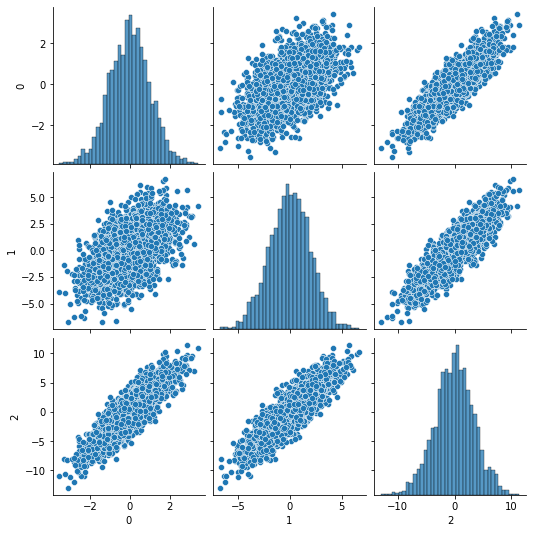

In [2]:
np.random.seed(2087630)

def generate_set(N, mean=[0, 0, 0], cov=np.diag((1,3,0))):
    X = np.random.multivariate_normal(mean,cov,N)
    X[:,1] += X[:,0]
    X[:,2] = 2*X[:,0] + X[:,1]
    return X

N = 3000

X0 = generate_set(N)
X = np.ones((N,3))

for i in range(3):
    X[:,i] = X0[:,i] - X0[:,i].mean()
    
sns.pairplot(pd.DataFrame(X))

In [3]:
X = X.T #I have to consider the data matrix transpose for PCA

Cov = np.cov(X)
l, V = la.eig(Cov)

In [4]:
U, spectrum, Vt = np.linalg.svd(X) #this returns the eigenvalues in decreasing order

l_eig = np.sort(np.real_if_close(l))[::-1]
V[:, [1, 2]] = V[:, [2, 1]]

In [5]:
l_svd = spectrum**2/(N-1)  #spectrum = D is a diagonal matrix with the square roots of the eigenvalues of XX.T

In [6]:
print('Are the found eigenvalues the same for both methods?', np.allclose(l_svd, l_eig))

Are the found eigenvalues the same for both methods? True


In [7]:
#U is the matrix that diagonilize the matrix XX.T (i.e. the coviariance * N-1), i.e. the eigenvectors matrix
print('Are the found eigenvectors matrices the same for both methods?', np.allclose(V, U))

Are the found eigenvectors matrices the same for both methods? True


In [8]:
Lambda = np.diag(l_svd)
#Using only the first principal component we have the 93% of variability which is retained.
Lambda[0:1, 0:1].trace()/Lambda.trace()

0.9321215341528134

In [9]:
#taking the first two:
Lambda[0:2, 0:2].trace()/Lambda.trace()
#in fact the third one is completely dependent from the first two.

1.0

In [10]:
Xp = np.dot(U.T, X)

In [11]:
def hev(x):
    return int((np.sign(x)+1)/2)

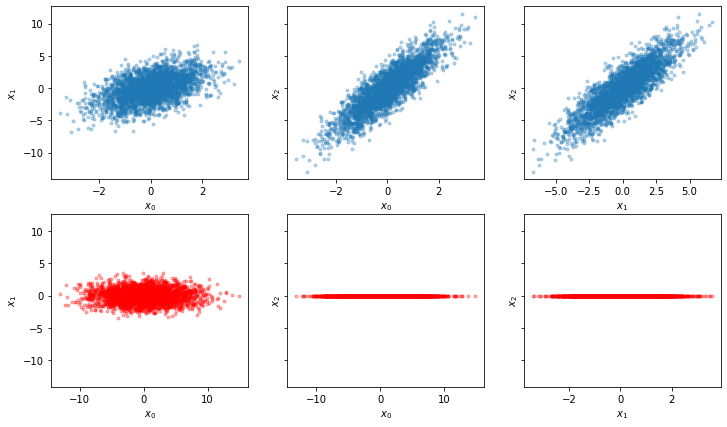

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize = (12,7), sharey=True)

for j in range(0, 3):
    ax[0][j].scatter(X[hev(j-1), :], X[hev(j)+1,:], alpha=0.3, marker = '.')
    ax[1][j].scatter(Xp[hev(j-1),:], Xp[hev(j)+1,:], alpha = 0.3, color = 'red', marker = '.')
    
    ax[0][j].set_xlabel(f'$x_{hev(j-1)}$')
    ax[1][j].set_xlabel(f'$x_{hev(j-1)}$')
    ax[0][j].set_ylabel(f'$x_{hev(j)+1}$')
    ax[1][j].set_ylabel(f'$x_{hev(j)+1}$')

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [13]:
def generate_noise(N, n=10):
    mean = [0]*n
    cov = np.diag(np.random.random(10)*3/50)
    noise = np.random.multivariate_normal(mean, cov, N)
    return noise.T

In [14]:
X = X0.T
noise = generate_noise(N).sum(axis=0)
for i in range(3):
    X[i,:] = X[i,:] + noise

In [15]:
for i in range(3):
    X[i,:] -= X[i,:].mean()
    
U, spectrum, Vt = np.linalg.svd(X)
l_svd = spectrum**2/(N-1)

Lambda = np.diag(l_svd)
#taking the first two principal components:
Lambda[0:2, 0:2].trace()/Lambda.trace()

0.9869767205713944

In [16]:
Xp = np.dot(U.T, X)

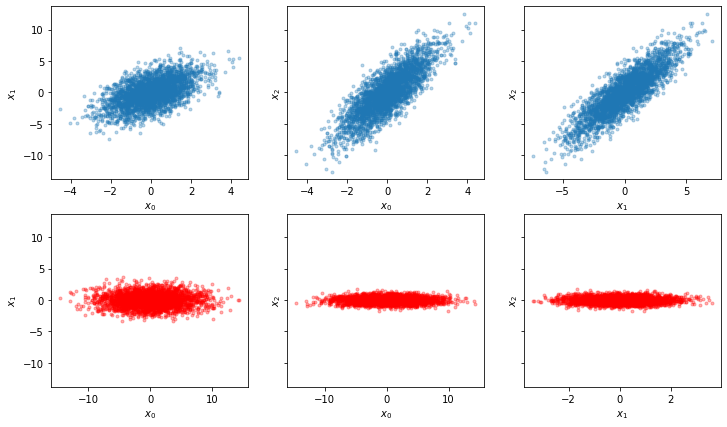

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize = (12,7), sharey=True)

for j in range(0, 3):
    ax[0][j].scatter(X[hev(j-1), :], X[hev(j)+1,:], alpha=0.3, marker = '.')
    ax[1][j].scatter(Xp[hev(j-1),:], Xp[hev(j)+1,:], alpha = 0.3, color = 'red', marker = '.')
    
    ax[0][j].set_xlabel(f'$x_{hev(j-1)}$')
    ax[1][j].set_xlabel(f'$x_{hev(j-1)}$')
    ax[0][j].set_ylabel(f'$x_{hev(j)+1}$')
    ax[1][j].set_ylabel(f'$x_{hev(j)+1}$')

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


In [18]:
N = 2000 #number of records per camera

def spring_motion_sim(N, noise=0.01):
    """
    Records with theta = 0. 
    NB! x(0) = L = 1; k/m = 2pi; T = 1
    Consider 10 complete oscillation.
    """
    time = np.linspace(0, 10, N)
    X = np.ones((time.size,3))
    for i,t in enumerate(time):
        X[i,0] = np.cos(2*np.pi*t)
        X[i,1] = np.random.normal(scale=noise)
        X[i,2] = 0
    return X.T, time

def Rx(th):
    return np.array([
        [1,          0,          0],
        [0, np.cos(th),-np.sin(th)],
        [0, np.sin(th), np.cos(th)]
    ])

def Ry(th):
    return np.array([
        [ np.cos(th), 0, np.sin(th)],
        [0          , 1,          0],
        [-np.sin(th), 0, np.cos(th)]
    ])

def Rz(th):
    return np.array([
        [np.cos(th),-np.sin(th), 0],
        [np.sin(th), np.cos(th), 0],
        [0         , 0         , 1]
    ])

In [19]:
X, time = spring_motion_sim(N)

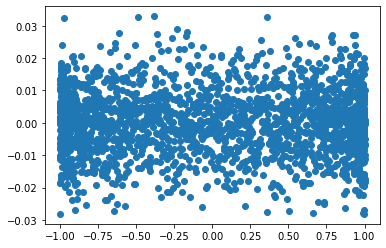

In [20]:
plt.scatter(X[0], X[1])

In [21]:
theta = np.pi/2
XR = X
Xx = np.dot(Rx(theta), X)
XR = np.concatenate((XR, Xx))
#for i in range(3):
#    Xx = np.dot(Rx(theta[i]), X)
#    Xy = np.dot(Ry(theta[i+3]), X)
#    Xz = np.dot(Rz(theta[i+6]), X)
#    XR = np.concatenate((XR, Xx))
#    XR = np.concatenate((XR, Xy))
#    XR = np.concatenate((XR, Xz))

In [22]:
U, spectrum, Vt = np.linalg.svd(XR)
l_svd = spectrum**2/(N-1)

Lambda = np.diag(l_svd)
#taking the first principal components:
Lambda[0:1, 0:1].trace()/Lambda.trace()

0.999789873545431

In [23]:
X_pca = np.dot(U.T, XR)

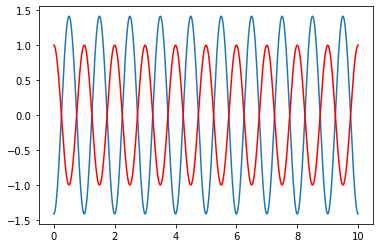

In [24]:
plt.plot(time, X_pca[0])
plt.plot(time, XR[0], color = 'red')

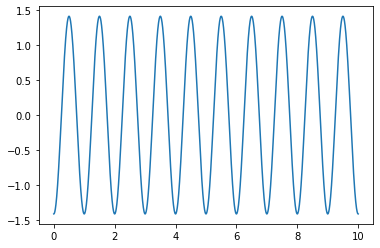

In [25]:
XR = XR.T
pca = PCA(n_components=1)
pca.fit_transform(XR)

plt.plot(time, pca.fit_transform(XR))